In [1]:
import numpy as np
import pandas as pd
import scipy
from matplotlib import pyplot as plt
from scipy.stats import special_ortho_group

N = 10*1000*1000 #Number of iterations for Monte Carlo simulations

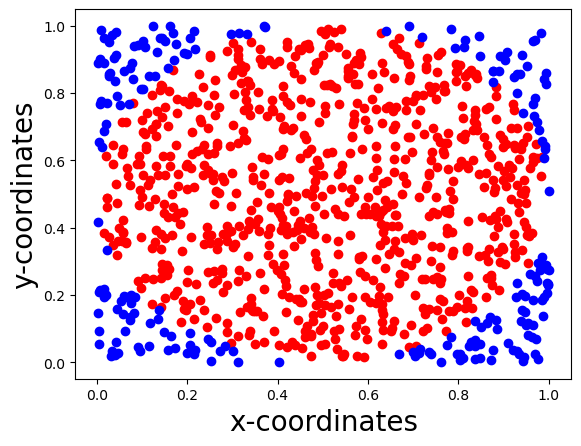

In [2]:
#Plot showing Monte Carlo simulation for estimating \pi from random x,y coordinates generated in an excel file
#x,y coordinates are chosen uniformly randomly in a unit square to estimate proportion of points in the circle

file = pd.read_excel('montecarlo_simulation_pi.ods')
x_1 = file.loc[file['Indicator']==1,'X-coordinate']
y_1 = file.loc[file['Indicator']==1,'Y-coordinate']
x_2 = file.loc[file['Indicator']==0,'X-coordinate']
y_2 = file.loc[file['Indicator']==0,'Y-coordinate']
plt.scatter(x_1,y_1,c="r")
plt.scatter(x_2,y_2,c="b")
plt.xlabel('x-coordinates', fontsize = 20)
plt.ylabel('y-coordinates', fontsize = 20)
plt.show()

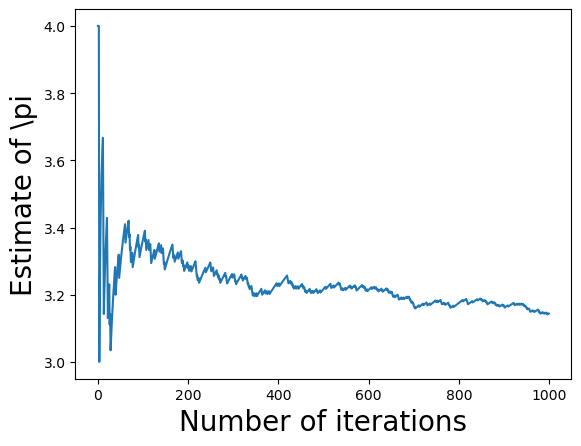

Estimate of \pi after the iterations is: 3.144


In [3]:
#Plotting the estimates of \pi in the above simulation as a function of the the number of iterations

m = file['Mean']
x = range(len(m))
plt.plot(x,m)
plt.xlabel('Number of iterations', fontsize = 20)
plt.ylabel('Estimate of \pi', fontsize = 20)
plt.show()
print("Estimate of \pi after the iterations is:", m.iloc[-1])

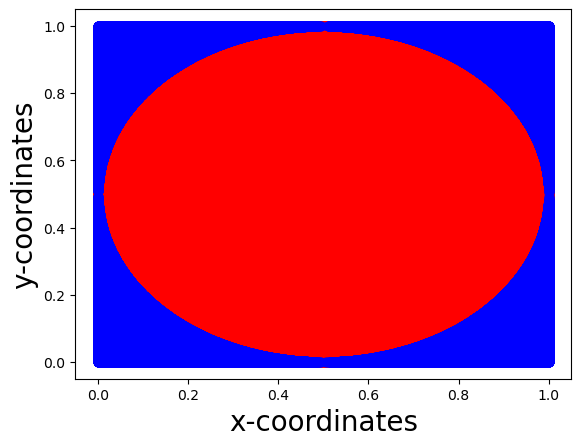

In [4]:
#Plot showing Monte Carlo Simulation for estimating \pi from random x,y coordinates chosen uniformly randomly
#x,y coordinates are chosen in a unit square to estimate proportion of points in the circle

x_all=np.random.uniform(0,1,N)
y_all=np.random.uniform(0,1,N)
x_1=[]
x_2=[]
y_1=[]
y_2=[]
e=[]
r=pow(0.5,2)
for i in range(N):
    if pow(x_all[i]-0.5,2)+pow(y_all[i]-0.5,2)<=r:
        x_1.append(x_all[i])
        y_1.append(y_all[i])
    else:
        x_2.append(x_all[i])
        y_2.append(y_all[i])
    e.append(len(x_1)/(i+1))

plt.scatter(x_1,y_1,c="r")
plt.scatter(x_2,y_2,c="b")
plt.xlabel('x-coordinates', fontsize = 20)
plt.ylabel('y-coordinates', fontsize = 20)
plt.show()

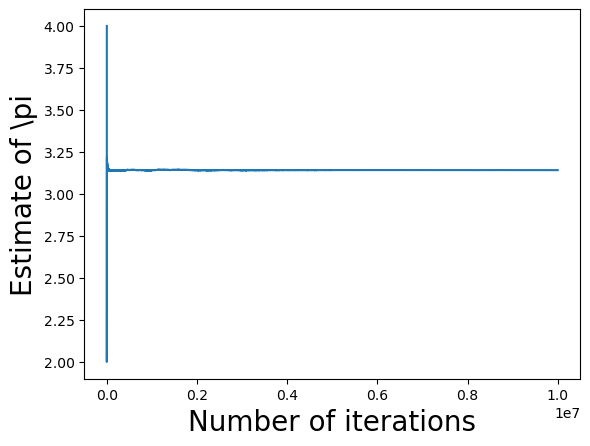

Estimate of \pi after 10000000 iterations is: 3.1415308


In [5]:
#Plotting the estimates of \pi in the above simulation as a function of the the number of iterations

plt.plot(range(N),[i*4 for i in e])
plt.xlabel('Number of iterations', fontsize = 20)
plt.ylabel('Estimate of \pi', fontsize = 20)
plt.show()
print("Estimate of \pi after",N,"iterations is:", e[-1]*4)

Number of horizontal crossings in the first 25 needles dropped: 7
Number of vertical crossings in the first 25 needles dropped: 9
Total number of horizontal crossings among all 10000000 needles dropped: 3181387
Number of vertical crossings among all 10000000 needles dropped: 3184467


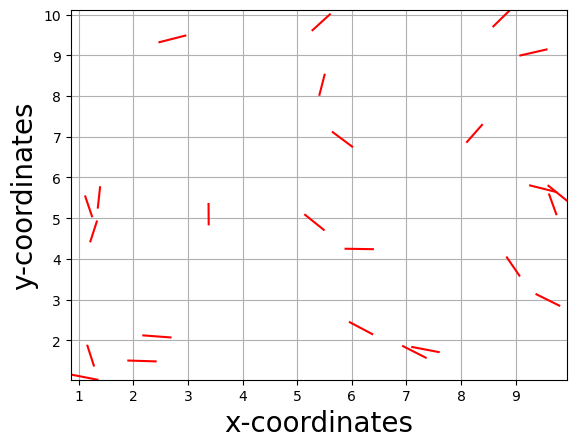

Estimate of \pi after 10000000 iterations by counting number of horizontal crossings is: 3.1432831026215924
Estimate of \pi after 10000000 iterations by counting number of vertical crossings is: 3.140242935473974
Estimate of \pi after 10000000 iterations by counting number of horizontal and vertical crossings is: 3.1417622835836325


In [6]:
#Estimating \pi by dropping N needles of length 2*l on a graph sheet with one unit spacing
#We count the number of horizontal crossings h and number of vertical crossings v of the needles with the graph sheet lines
#h/N and v/N are estimates of 4*l/\pi
#(h+v)/N is an estimate of 8*l/pi
#If N is too small, division by zero might occur as there might be zero horizontal or vertical crossings

#N=1000 #Can change N here if we want to run Monte Carlo simulation on smaller number of iterations.
l=1/4 #The length of each needle which is 2*l can be any constant less than one, since the spacing in the graph sheet is one unit.
h,v=0,0
data=[]
plot_needles = 25 #It is easier to see just these many needles on the plot. It can be changed to N to see all needles.
for i in range(N):
    m=special_ortho_group.rvs(2) #Random rotation matrix is chosen here to rotate needle
    x1 = 1+9*np.random.uniform(0,1) 
    y1 = 1+9*np.random.uniform(0,1)
    ndl=np.dot(m,[2*l,0])
    x2,y2=ndl[0]+x1,ndl[1]+y1
    if np.floor(x1)!= np.floor(x2):
        h+=1
    if np.floor(y1)!= np.floor(y2):
        v+=1
    if i<np.min([plot_needles,N]):
        h_min=h
        v_min=v
        data.append((x1,x2))
        data.append((y1,y2))
        data.append('r')
print("Number of horizontal crossings in the first",plot_needles,"needles dropped:",h_min)
print("Number of vertical crossings in the first",plot_needles,"needles dropped:",v_min)
print("Total number of horizontal crossings among all",N,"needles dropped:",h)
print("Number of vertical crossings among all",N,"needles dropped:",v)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.margins(x=0, y=0)
grid_points = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
ax.xaxis.set_ticks(grid_points)
ax.yaxis.set_ticks(grid_points)
plt.plot(*data)
plt.grid()
plt.xlabel('x-coordinates', fontsize = 20)
plt.ylabel('y-coordinates', fontsize = 20)
plt.show()
print("Estimate of \pi after",N,"iterations by counting number of horizontal crossings is:",4*l*N/h)
print("Estimate of \pi after",N,"iterations by counting number of vertical crossings is:",4*l*N/v)
print("Estimate of \pi after",N,"iterations by counting number of horizontal and vertical crossings is:",8*l*N/(h+v))

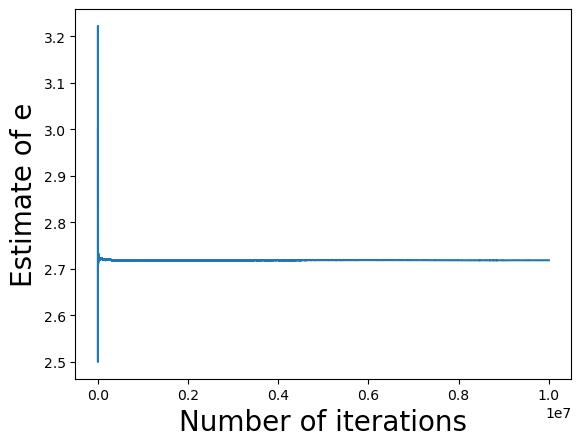

Estimate of Euler's number e after 10000000 iterations is: 2.7185036


In [7]:
#Estimating Euler's number e by Monte Carlo simulation

est=[]
prev_sum=0
for i in range(N):
    s=0
    n=0
    while s<=1:
        s=s+np.random.uniform(0,1)
        n=n+1
    prev_sum=prev_sum+n
    est.append(prev_sum/(i+1))
plt.plot(range(N),est)
plt.xlabel('Number of iterations', fontsize = 20)
plt.ylabel('Estimate of e', fontsize = 20)
plt.show()
print("Estimate of Euler's number e after",N,"iterations is:",est[-1])

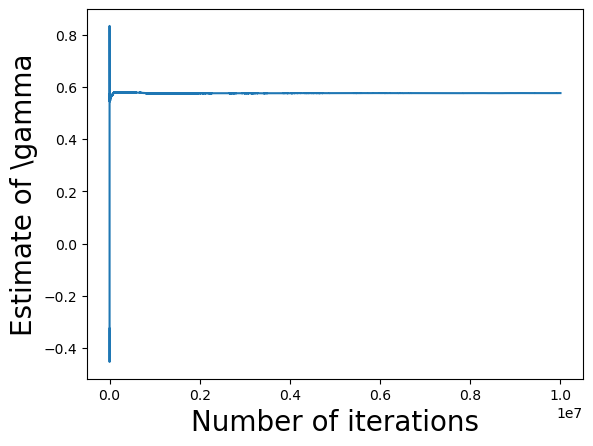

Estimate of Euler's constant \gamma after 10000000 iterations is: 0.5763924506792433


In [8]:
#Estimating Euler's constant \gamma by Monte Carlo simulation as the expected value of Gumbel distribution

prev_sum=0
est=[]
for i in range(N):
    v=-np.log(-np.log(np.random.uniform(0,1)))
    prev_sum=prev_sum+v
    est.append(prev_sum/(i+1))
plt.plot(range(N),est)
plt.xlabel('Number of iterations', fontsize = 20)
plt.ylabel('Estimate of \gamma', fontsize = 20)
plt.show()
print("Estimate of Euler's constant \gamma after",N,"iterations is:",est[-1])

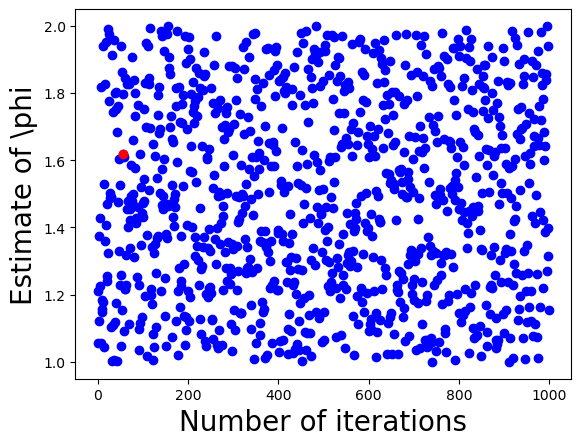

Estimate of the golden ratio \phi after 1000 iterations is: 1.6183561481219348


In [9]:
#Estimating Golden Ratio \phi by Monte Carlo simulation using the fact that (a+b)/a must be close to a/b

N=1000 #It is easier to see the scatter plot with N=1000 and the estimate is reasonably good
m=1
est=[]
for i in range(N):
    x=np.random.uniform(0,1)
    y=np.random.uniform(0,1)
    a=np.max([x,y])
    b=np.min([x,y])
    f1=(a+b)/a
    f2=a/b
    v=f1-f2
    if v>0 and v<m:
        m=v
        z=i
        ans=f1
    est.append(f1)
plt.scatter(range(N),est,c="b")
plt.scatter([z],[ans],c="r")
plt.xlabel('Number of iterations', fontsize = 20)
plt.ylabel('Estimate of \phi', fontsize = 20)
plt.show()
print("Estimate of the golden ratio \phi after",N,"iterations is:",ans)

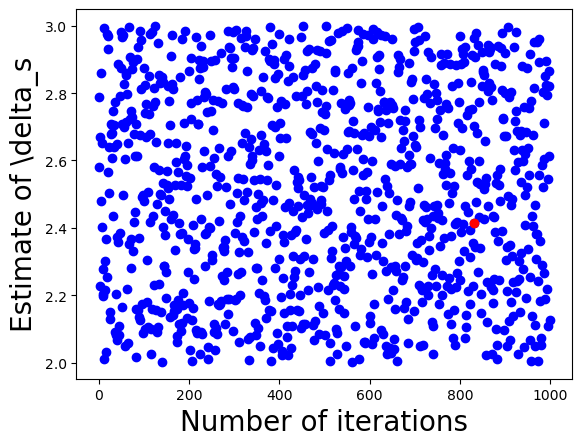

Estimate of the silver ratio \delta_s after 1000 iterations is: 2.4146911909635933


In [10]:
#Estimation Silver Ratio \delta by Monte Carlo simulation using the fact that (2a+b)/a must be close to a/b

N=1000 #It is easier to see the scatter plot with N=1000 and the estimate is reasonably good
m=1
est=[]
for i in range(N):
    x=np.random.uniform(0,1)
    y=np.random.uniform(0,1)
    a=np.max([x,y])
    b=np.min([x,y])
    f1=(2*a+b)/a
    f2=a/b
    v=f1-f2
    if v>0 and v<m:
        m=v
        z=i
        ans=f1
    est.append(f1)
plt.scatter(range(N),est,c="b")
plt.scatter([z],[ans],c="r")
plt.xlabel('Number of iterations', fontsize = 20)
plt.ylabel('Estimate of \delta_s', fontsize = 20)
plt.show()
print("Estimate of the silver ratio \delta_s after",N,"iterations is:",ans)